In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = [15, 5]

import warnings
warnings.filterwarnings('ignore')

In [2]:
%load_ext autoreload
%autoreload 2
%run '../../main.py'


from lib.helper import Functions
from lib.store.influxstore import InfluxStore

In [22]:
dataSetOps = DataSetOps()

# dataSetOps.import_data_set('/media/taleh/TIsStorage/archive/finance-data/currency/Historical/EURUSD/DAT_ASCII_EURUSD_M1_201902.csv')
dataSetOps.import_years(2018, 2018)
dataSetOps.prepare10Min()

df = dataSetOps.df

len(df)

37194

In [23]:
df['amp_n'] = Functions.calc_normal_dist(df['amp'], 1)
df['diff_n'] = Functions.calc_normal_dist(df['diff'], 1)

In [5]:
df['amp'].max() * 10000

113.09999999999931

In [24]:
is_c1_v = []

for i in range(0, len(df)):
    price = df.iloc[i]['price']
    fMin  = df.iloc[i]['f_min']
    fMax  = df.iloc[i]['f_max']
    fPrice  = df.iloc[i]['f_price']
    
    if (fMax - price) * 10000 > 5:
        is_c1_v.append(3 / 10000)
    else:
        is_c1_v.append(price - fPrice - 2 / 10000)
        

df['is_c1_v'] = is_c1_v
is_c1_v = df['is_c1_v']

___________RESULT___________
confusion matrix: [[19596  1361]
 [11349  4888]]
class_accuracy => accuracy:  0.6180491656769611 risk:  0.2177948471755481
class positive match: 0.13141904608270152
class positive match usage: 0.3010408326661329
________DAILY_METRICS_______
max daily risk 1.0
daily risk plot: AxesSubplot(0.125,0.2;0.775x0.68)
________VALUE_METRICS_______
wonValueSum 2.32298000000001
lostValueSum 0.32374000000000636
resultValueSum 1.9992400000000037
resultValueP 0.8776825655906163
wonValueCount 4888
lostValueCount 1361
resultValueCount 6249
resultValueCountP 0.7822051528244519


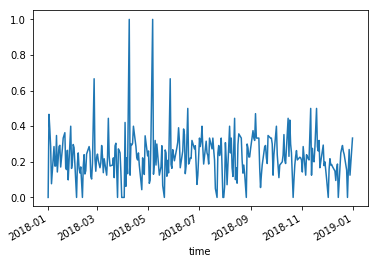

In [25]:
winMin = 10
winMax = 70

is_c1 = (df['amp'] * 10000 > winMin) & (df['amp'] * 10000 < winMax)

from lib.metric.simpleclassmetric import SimpleClassMetric

metric = SimpleClassMetric(df, is_c1, is_c1_v > 0, is_c1_v)

metric.calculate()
metric.show()

In [28]:
def func1(arr):
    for elem in arr:
       if elem > 0:
        return 1
    return 0

df['a'] = is_c1_v.rolling(window=10).apply(func1)
df.dropna(inplace=True)
print(len(df[df['a'] == 0]) / (len(df[df['a'] == 1]) + len(df[df['a'] == 0])))

0.06416565819550894


In [27]:
df

,open,min,max,close,high,low,price,diff,amp,amp_n,f_price,f_min,f_max,time,diff_n,is_c1_v,a
time,,,,,,,,,,,,,,,,,
2018-01-01 18:00:00,1.20139,1.20020,1.20139,1.20091,1.20139,1.20020,1.20091,0.00002,0.00057,0.050398,1.20137,1.20082,1.20158,2018-01-01 18:00:00,0.002972,3.000000e-04,1.0
2018-01-01 18:10:00,1.20091,1.20082,1.20158,1.20137,1.20158,1.20082,1.20137,-0.00045,0.00062,0.054819,1.20133,1.20096,1.20138,2018-01-01 18:10:00,-0.075251,-1.600000e-04,1.0
2018-01-01 18:20:00,1.20137,1.20096,1.20138,1.20133,1.20138,1.20096,1.20133,0.00046,0.00025,0.022104,1.20117,1.20113,1.20150,2018-01-01 18:20:00,0.068351,-4.000000e-05,1.0
2018-01-01 18:30:00,1.20137,1.20113,1.20150,1.20117,1.20150,1.20113,1.20117,-0.00004,0.00057,0.050398,1.20105,1.20093,1.20120,2018-01-01 18:30:00,-0.006689,-8.000000e-05,1.0
2018-01-01 18:40:00,1.20120,1.20093,1.20120,1.20105,1.20120,1.20093,1.20105,-0.00016,0.00023,0.020336,1.20107,1.20097,1.20113,2018-01-01 18:40:00,-0.026756,-2.200000e-04,1.0
2018-01-01 18:50:00,1.20106,1.20097,1.20113,1.20107,1.20113,1.20097,1.20107,-0.00012,0.00020,0.017683,1.20116,1.20093,1.20117,2018-01-01 18:50:00,-0.020067,-2.900000e-04,0.0
2018-01-01 19:00:00,1.20106,1.20093,1.20117,1.20116,1.20117,1.20093,1.20116,0.00002,0.00002,0.001768,1.20146,1.20115,1.20165,2018-01-01 19:00:00,0.002972,-5.000000e-04,0.0
2018-01-01 19:10:00,1.20117,1.20115,1.20165,1.20146,1.20165,1.20115,1.20146,0.00009,0.00024,0.021220,1.20145,1.20141,1.20177,2018-01-01 19:10:00,0.013373,-1.900000e-04,0.0
2018-01-01 19:20:00,1.20147,1.20141,1.20177,1.20145,1.20177,1.20141,1.20145,0.00030,0.00046,0.040672,1.20132,1.20131,1.20148,2018-01-01 19:20:00,0.044577,-7.000000e-05,0.0


In [8]:
# from highcharts import Highstock

# # A chart is the container that your data will be rendered in, it can (obviously) support multiple data series within it.
# chart = Highstock()

# chart

# # Adding a series requires at minimum an array of data points. 
# # You can also change the series type, the name, or other series options as kwargs.

# dfv = df.head(3000)

# historical = []
# amp = []
# diff = []
# class_2 = []

# chart.set_options('yAxis', [{
#       "labels": {
#         "align": 'right',
#       },
#       "title": {
#         "text": 'Prices'
#       }
#     }, {
#       "labels": {
#         "align": 'right',
#       },
#       "title": {
#         "text": 'Prices'
#       }
#     }])

# for i in range(0, len(dfv)):
#     historical.append([dfv.iloc[i]['time'], dfv.iloc[i]['price']])
#     amp.append([dfv.iloc[i]['time'], dfv.iloc[i]['amp_n']])
#     diff.append([dfv.iloc[i]['time'], dfv.iloc[i]['diff_n']])
#     class_2.append([dfv.iloc[i]['time'], int(dfv.iloc[i]['class_1'])])    

# chart.add_data_set(historical, series_type='line', name='EUR USD historical', yAxis=1)
# chart.add_data_set(class_2, series_type='line', name='class1', yAxis=0)
# # chart.add_data_set(diff, series_type='line', name='Diff', yAxis=0)

# # chart


In [89]:
df

,open,min,max,close,price,diff,amp,amp_n,f_min,f_max,time,diff_n,is_c1_v
time,,,,,,,,,,,,,
2018-01-01 17:20:00,1.20053,1.20042,1.20065,1.20065,1.20065,-0.00044,0.00002,0.001768,1.20063,1.20164,2018-01-01 17:20:00,-0.073579,-0.00119
2018-01-01 17:30:00,1.20064,1.20063,1.20164,1.20134,1.20134,0.00015,0.00033,0.029178,1.20131,1.20149,2018-01-01 17:30:00,0.022288,-0.00035
2018-01-01 17:40:00,1.20131,1.20131,1.20149,1.20134,1.20134,0.00069,0.00017,0.015031,1.20132,1.20151,2018-01-01 17:40:00,0.102526,-0.00037
2018-01-01 17:50:00,1.20132,1.20132,1.20151,1.20136,1.20136,0.00000,0.00131,0.115827,1.20020,1.20139,2018-01-01 17:50:00,0.000000,0.00116
2018-01-01 18:00:00,1.20139,1.20020,1.20139,1.20091,1.20091,0.00002,0.00057,0.050398,1.20082,1.20158,2018-01-01 18:00:00,0.002972,-0.00087
2018-01-01 18:10:00,1.20091,1.20082,1.20158,1.20137,1.20137,-0.00045,0.00062,0.054819,1.20096,1.20138,2018-01-01 18:10:00,-0.075251,0.00041
2018-01-01 18:20:00,1.20137,1.20096,1.20138,1.20133,1.20133,0.00046,0.00025,0.022104,1.20113,1.20150,2018-01-01 18:20:00,0.068351,-0.00037
2018-01-01 18:30:00,1.20137,1.20113,1.20150,1.20117,1.20117,-0.00004,0.00057,0.050398,1.20093,1.20120,2018-01-01 18:30:00,-0.006689,-0.00023
2018-01-01 18:40:00,1.20120,1.20093,1.20120,1.20105,1.20105,-0.00016,0.00023,0.020336,1.20097,1.20113,2018-01-01 18:40:00,-0.026756,-0.00028
